<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week6/Clustering%20Model/clusteringweek06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Andi Cleopatra Maryam Jamila (1103213071)**

**Langkah 1: Persiapan dan Pemahaman Data**

In [1]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


* pandas dan numpy untuk manipulasi data.
* seaborn dan matplotlib untuk visualisasi.
* StandardScaler untuk normalisasi data.
* KMeans untuk metode clustering.
* silhouette_score untuk mengevaluasi hasil clustering.
* KElbowVisualizer untuk menentukan jumlah klaster optimal.

In [2]:
# Membaca dan Mengeksplorasi Data
data = pd.read_csv('/content/sample_data/clusteringweek06.csv')
data.info()  # Menampilkan informasi dasar data
data.head()  # Menampilkan 5 baris pertama untuk melihat struktur data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


* data.info() menunjukkan jenis data dan jumlah missing values.
* data.head() memberikan gambaran awal tentang fitur yang tersedia.

In [3]:
# Membersihkan Data (Jika diperlukan)
data = data.dropna()  # Menghapus baris dengan nilai kosong


* Membersihkan data memastikan hasil clustering lebih akurat tanpa gangguan dari data yang hilang atau tidak valid.

**Langkah 2: Menyiapkan Data untuk Clustering**

In [5]:
# Pemilihan Fitur dan Normalisasi
features = ['x2', 'x3', 'x4']  # Pilih kolom yang relevan untuk clustering
data_selected = data[features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)



* Normalisasi diperlukan agar semua variabel berada pada skala yang sama, mengurangi pengaruh fitur tertentu.

**Langkah 3: Menentukan Jumlah Klaster Optimal**

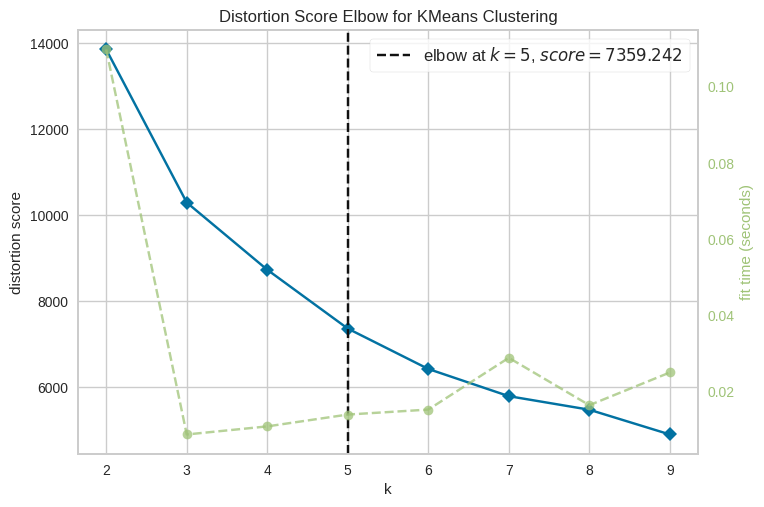

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
# Metode Elbow untuk Menentukan Jumlah Klaster
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data_scaled)
visualizer.show()


* Penjelasan:
Elbow method membantu kita menemukan jumlah klaster optimal. Titik elbow pada grafik adalah jumlah klaster terbaik di mana inertia tidak menurun secara signifikan lagi.
* Insight: Jumlah klaster optimal ditentukan oleh titik terakhir di mana terdapat penurunan signifikan dalam nilai inertia.

**Langkah 4: Membuat Model Clustering**

In [7]:
# Membangun Model K-Means dengan Jumlah Klaster Optimal
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
labels = kmeans.fit_predict(data_scaled)
data['Cluster'] = labels


* Penjelasan:
fit_predict mengelompokkan data dan memberikan label klaster untuk setiap titik data.
* Insight: Setiap data sekarang memiliki label klaster, yang mengelompokkan data berdasarkan kemiripannya dengan data lain.

**Langkah 5: Evaluasi Model Clustering**

In [8]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(data_scaled, labels)
print("Silhouette Score untuk model K-Means:", silhouette_avg)


Silhouette Score untuk model K-Means: 0.3225484386768794


* Penjelasan:
Silhouette score berkisar dari -1 hingga 1, dengan nilai mendekati 1 menunjukkan klaster yang baik.
* Insight: Semakin tinggi silhouette score, semakin baik pemisahan antar klaster.

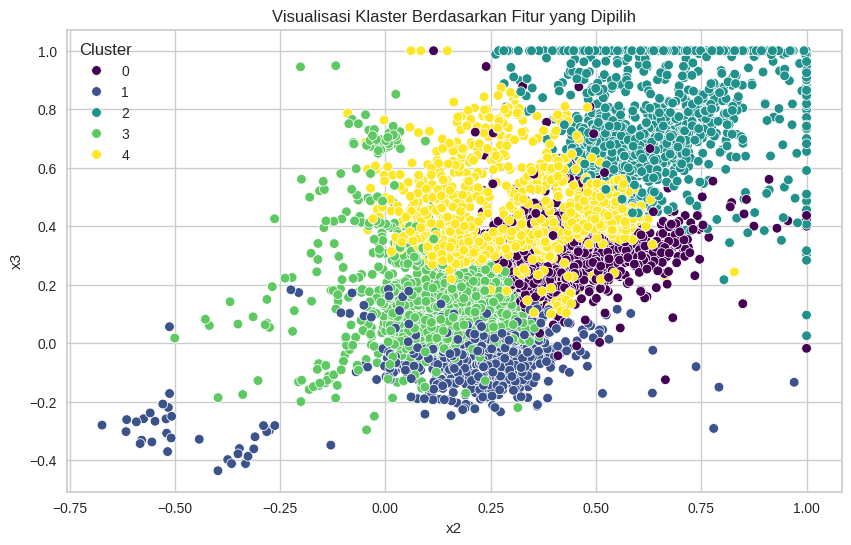

In [10]:
# Visualisasi Hasil Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['x2'], y=data['x3'], hue=data['Cluster'], palette='viridis')
plt.title("Visualisasi Klaster Berdasarkan Fitur yang Dipilih")
plt.show()


* Penjelasan:
Scatter plot menunjukkan distribusi data dan batas klaster.
* Insight: Melihat posisi setiap klaster dapat membantu kita memahami apakah klaster tersebut terpisah dengan baik.